In [97]:
%matplotlib inline

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os

In [99]:
# Files to load.

city_data_to_load = "Resources/city_data.csv"

ride_data_to_load = "Resources/ride_data.csv"

In [100]:
# Read the city file using file path.

pd.read_csv("Resources/city_data.csv")

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [101]:
# Read the city file using the variable "city_data_to_load" and store it in a DataFrame.

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [102]:
# Read the ride file and store it in a DataFrame.

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [103]:
# Get the columns and rows that are NOT null.

city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [104]:
# Above, all columns contain the same # of rows. Use the isnull() with sum() to double-check.

city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [105]:
# Get data types for each column.

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [106]:
# Get number of unique values for types of city.

city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [107]:
# Get the number of data points for URBAN cities.

sum(city_data_df["type"] == "Urban")

66

In [108]:
# Get the number of data points for SUBURBAN cities.

sum(city_data_df["type"] == "Suburban")

36

In [109]:
# Get the number of data points for RURAL cities.

sum(city_data_df["type"] == "Rural")

18

In [110]:
# Get the columns and rows that are NOT null in the "ride" data.

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [111]:
# Above, all columns contain the same # of rows. Use the isnull() with sum() to double-check.

ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [112]:
# Get data types for each column.

ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [113]:
# MERGE both DFs into a single dataset using the "city" column they both have in common. 

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [114]:
# Create a bubble chart or scatter plot. NOTE: Create DataFrames for each "type" first.

driver_count_type = city_data_df.groupby(['type'])['driver_count'].sum

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [115]:
rural_cities_df.head()


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [116]:
# Get the number of rides for each city type.

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [117]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [118]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [119]:
# Get the average fare for each city type.

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [120]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare.head()


city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [121]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare.head()


city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [122]:
# Get the average number of drivers for each city type.

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [123]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count.head()


city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [124]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count.head()


city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

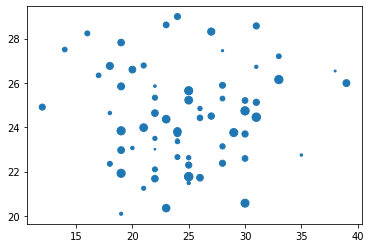

In [125]:
# Create the Urban Cities bubble chart or scatter plot. Make markers' size correlate with driver_count.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=urban_driver_count)


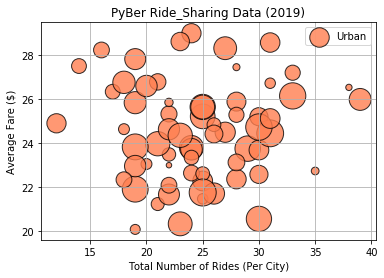

In [126]:
# Format the Urban Cities bubble chart.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

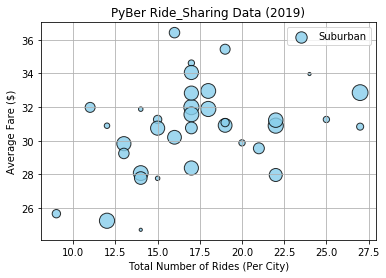

In [127]:
# Create the Suburban Cities bubble chart.

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


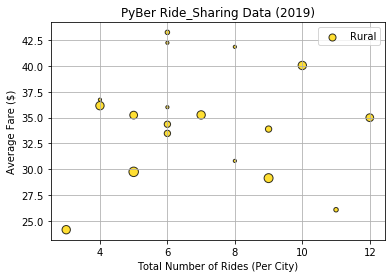

In [128]:
# Create the Rural Cities bubble chart.

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

plt.title("PyBer Ride_Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()


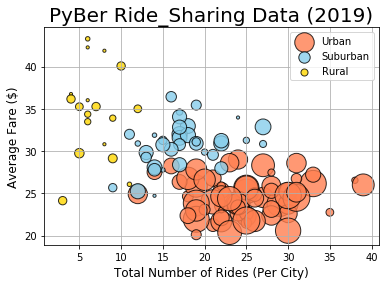

In [129]:
# Combine all 3 bubble charts, but leave titles at the end since they're the same for all 3 charts.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

# Incorporate titles and increase font size.

plt.title("PyBer Ride_Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

plt.legend()


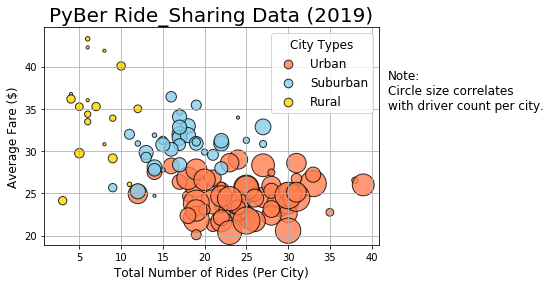

In [130]:
# Updating the LEGEND (see legend section towards the bottom).

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10*rural_driver_count, c="gold",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Rural")

plt.title("PyBer Ride_Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Update the LEGEND.

lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Add a NOTE using the plt.text() function. REMEMBER the 1st 2 numbers are the (x,y) coordinates.
# This adds the NOTE to the right of the legend.

plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure using the plt.savefig() function ...Add a direct path to the "Analysis" folder & filename.

plt.savefig("Analysis/Fig1.png")

plt.show()